# Homework 1

Daniil Sherki

# Problem statement

A pure n-pentane is held in a laboratory cell at 110°F. By means of the method proposed by Lee and Kesler (1975), determine pressure ranges where n-pentane is in a liquid phase and where - in vapor. Additionally, determine the “existence state” of propane, n-decane, and carbon dioxide at the vapor pressure of n-pentane at the same laboratory cell (T=110°F).

# Solution

## Theory

### 1. Lee and Kesler (1975) vapor pressure equation

$$ p_v = p_c \cdot \exp(A+\omega B) $$

With the coefficients $A$ and $B$ as defined below:

$$ A = 5.92714 - \frac{6.09648}{T_r}  - 1.2488 \log{T_r} + 0.16934 (T_r)^{6} $$

$$ B = 15.2518 - \frac{15.6875}{T_r}  - 13.4721 \log{T_r} + 0.4357 (T_r)^{6} $$

Where:

*   $T_r$ - reduced temperature; 
*   $T$ - substance temperature, $^{\mathrm{o}}\mathrm{R}$;
*   $T_c$ - critical temperature of the substance, $^{\mathrm{o}}\mathrm{R}$;
*   $p_c$ - critical pressure of the substance, psia;
*   $\omega$ - accentric factor of the substance.


And we can represent this expressions for simplicity like:

$$ a = \{ 5.92714, -6.09648, -1.2488, 0.16934 \} $$

$$ b = \{ 15.2518, -15.6875, -13.4721, 0.4357 \} $$

$$ t_r = \{ 1, \frac{1}{T_r}, \log{T_r}, T_r^{6} \}$$

$$ A = \langle a, t_r\rangle $$

$$ B = \langle b, t_r\rangle $$

---
## Practice

### Some utils stuff

In [2]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [3]:
# conversion functions to convert one measurement systems into other 

class Conversion():
    def __init__(self):
        pass
    
    def R2F(self, x):
        '''
        :param x: float; // R degress
        return: float. // F degrees
        '''
        return x - 459.67

    def F2R(self, x):
        '''
        :param x: float; // F degress
        return: float. // R degrees
        '''
        return x + 459.67
    
    def psia2bar(self, x):
        '''
        1 psi = 0.0689475729 bar
        :param x: float; // psia
        return: float. // bar
        '''
        return 0.0689475729 * x

    def bar2psia(self, x):
        '''
        1 bar = 14.503773773 psi
        :param x: float; // bar
        return: float. // psia
        '''
        return 14.503773773 * x

In [4]:
c = Conversion()

### Vapor pressure equation (Lee and Kesler model implementation)

In [5]:
def vapor_pressure_equation(p_c, T_c, w, T = c.F2R(110)):
    '''
    :param p_c: numpy.ndarray; // critical pressure, psia
    :param T_c: float; // critical temperature, R degrees
    :param w: float; // accentric factor
    :param T: float; // temperature, R degrees
    :return: numpy.ndarray. // vapor pressure, psia
    '''
    T_r = T / T_c

    T_r_vec = np.array([1, 1/T_r, np.log(T_r), np.power(T_r, 6)])
    a = np.array([5.92714, -6.09648, -1.2488, 0.16934])
    b = np.array([15.2518, -15.6875, -13.4721, 0.4357])

    A = a.T @ T_r_vec
    B = b.T @ T_r_vec

    return p_c * np.exp(A + w * B)

In [6]:
df = pd.DataFrame({'p_c_psia': [488.6, 616.0, 305.2, 1071.0],
                   'T_c_F': [385.8, 206.06, 652.0, 87.91],
                   'w': [0.2514, 0.1522, 0.4898, 0.2667]},
                  index=['n-pentane', 'propane', ' n-decane', 'co2'])

## Fundamentals of Hydrocarbon Phase Behavior p.5-9

df['T_c_R'] = c.F2R(df['T_c_F'])
df['p_v_psia'] = vapor_pressure_equation(p_c = df['p_c_psia'], T_c = df['T_c_R'], w = df['w'])
df

<ipython-input-5-79ae267f32de>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  T_r_vec = np.array([1, 1/T_r, np.log(T_r), np.power(T_r, 6)])


,p_c_psia,T_c_F,w,T_c_R,p_v_psia
n-pentane,488.6,385.80,0.2514,845.47,18.323397
propane,616.0,206.06,0.1522,665.73,213.491813
n-decane,305.2,652.00,0.4898,1111.67,0.080521
co2,1071.0,87.91,0.2667,547.58,1422.215306


According to this calculations, we can consider that vapor pressure of n-pentane 18.32 psia. 

It's means that vapor phase exist in range of vapor $(0, 18.31) \text{ }\mathrm{psia}$ and non-vapor phase (included liquid) in range $> 18.31\text{ }\mathrm{psia}$.

For other substances vapor pressure:

*   propane  $213.49\text{ }\mathrm{psia}$;
*   n-decane $0.08\text{ }\mathrm{psia}$;
*   carbon dioxide $1422.22\text{ }\mathrm{psia}$.



## Results

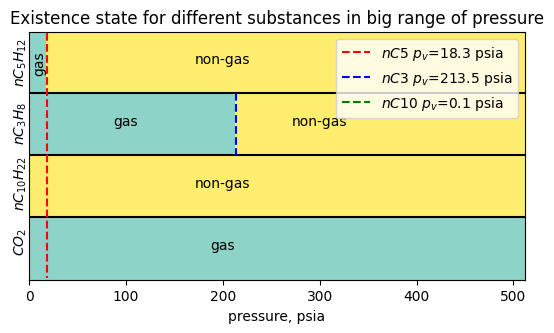

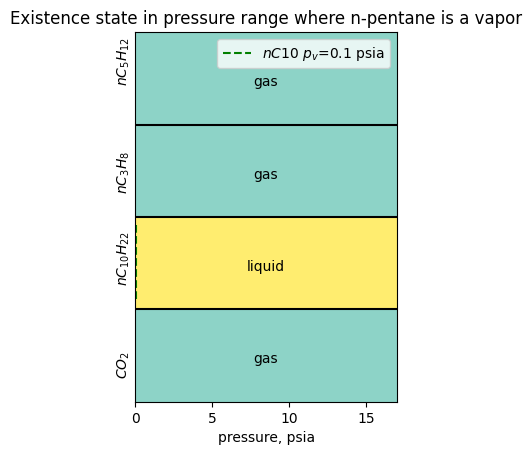

In [17]:
big_img = np.zeros((64, 512))
big_img[:, int(df['p_v_psia'][0]):] = 1
for i in range(1, 4):
    buf_img = np.zeros((64, 512))
    buf_img[:, int(df['p_v_psia'][i]):] = 1
    big_img = np.vstack((big_img, buf_img))
fig = plt.imshow(big_img, cmap = 'Set3')
fig.axes.get_yaxis().set_visible(False)
plt.text(-5, 230, r'$CO_2$', ha='left', rotation=90, wrap=True)
plt.text(-5, 184, r'$nC_{10}H_{22}$', ha='left', rotation=90, wrap=True)
plt.text(-5, 116, r'$nC_{3}H_{8}$', ha='left', rotation=90, wrap=True)
plt.text(-5, 56, r'$nC_{5}H_{12}$', ha='left', rotation=90, wrap=True)
plt.hlines(63, 0, 512, color='black')
plt.hlines(127, 0, 512, color='black')
plt.hlines(191, 0, 512, color='black')
plt.xlim(0,512)
plt.vlines(df['p_v_psia'][0], 1, 254,
           color = 'r', linestyle = 'dashed',
           label = fr"$nC5$ $p_v$={round(df['p_v_psia'][0],1)} psia")
plt.vlines(df['p_v_psia'][1], 63, 127,
           color = 'b', linestyle = 'dashed',
           label = fr"$nC3$ $p_v$={round(df['p_v_psia'][1],1)} psia")
plt.vlines(df['p_v_psia'][2], 127, 195,
           color = 'g', linestyle = 'dashed',
           label = fr"$nC10$ $p_v$={round(df['p_v_psia'][2],1)} psia")
plt.xlabel('pressure, psia')
plt.text(15,32, 'gas', ha='center', color = 'black',  rotation=90, wrap=True)
plt.text(200,32, 'non-gas', ha='center', color = 'black')
plt.text(300,96, 'non-gas', ha='center',color = 'black')
plt.text(100,96, 'gas', ha='center',color = 'black')
plt.text(200,160, 'non-gas', ha='center',color = 'black')
plt.text(200,224, 'gas', ha='center',color = 'black')
plt.legend()
plt.title('Existence state for different substances in big range of pressure')
plt.show()

big_img = np.zeros((6, 18))
big_img[:, int(df['p_v_psia'][0]):] = 1
for i in range(1, 4):
    buf_img = np.zeros((6, 18))
    buf_img[:, int(df['p_v_psia'][i]):] = 1
    big_img = np.vstack((big_img, buf_img))
fig = plt.imshow(big_img, cmap = 'Set3')
fig.axes.get_yaxis().set_visible(False)
plt.text(-0.5, 22, r'$CO_2$', ha='left', rotation=90, wrap=True)
plt.text(-0.5, 16, r'$nC_{10}H_{22}$', ha='left', rotation=90, wrap=True)
plt.text(-0.5, 10, r'$nC_{3}H_{8}$', ha='left', rotation=90, wrap=True)
plt.text(-0.5, 3, r'$nC_{5}H_{12}$', ha='left', rotation=90, wrap=True)
plt.hlines(5.5, 0, 23, color='black')
plt.hlines(11.5, 0, 23, color='black')
plt.hlines(17.5, 0, 23, color='black')
plt.xlim(0,17)
# plt.ylim(0,23)
plt.vlines(df['p_v_psia'][2], 12, 17,
           color = 'g', linestyles = 'dashed',
           label = fr"$nC10$ $p_v$={round(df['p_v_psia'][2],1)} psia")
plt.legend()
plt.xlabel('pressure, psia')
plt.text(8.5,3, 'gas', ha='center', color = 'black')
plt.text(8.5,9, 'gas', ha='center',color = 'black')
plt.text(8.5,15, 'liquid', ha='center',color = 'black')
plt.text(8.5,21, 'gas', ha='center',color = 'black')
plt.title('Existence state in pressure range where n-pentane is a vapor')
plt.show()

Thus, according to this figures at the vapor pressure of n-pentate different substances is exist in different phase state:

*  Propane is gas;
*  n-decane is a liquid;
*  Cardon dioxide is a gas;

at the same laboratory cell (T=110°F).

